### 5. **Análisis de Correlación y Regresión**
**Resumen:** Se centra en la identificación de relaciones significativas entre las variables numéricas y el desarrollo de modelos de regresión para hacer predicciones basadas en esas relaciones.

1. **Matriz de Correlación:** 
   - **Uso de Datos:** Utiliza las columnas numéricas del DataFrame (p. ej., `AveragePrice`, `Total Volume`, `4046`, `4225`, `4770`, `Total Bags`).
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Calcula la matriz de correlación usando el método `.corr()` del DataFrame.
     - Visualiza la matriz utilizando `sns.heatmap()`. 
     - Anota las correlaciones más significativas y discute su posible impacto en el análisis.

2. **Análisis de Dispersión entre Variables Clave:** 
   - **Uso de Datos:** Selecciona variables numéricas de interés como `AveragePrice` y `Total Volume`.
   - **Esperado:** 
     - Importa las librerías necesarias: `import seaborn as sns` y `import matplotlib.pyplot as plt`.
     - Crea un gráfico de dispersión con `sns.scatterplot()` para visualizar la relación entre `AveragePrice` y `Total Volume`.
     - Añade una línea de regresión utilizando `sns.regplot()` para ilustrar las tendencias.
     - Compara el ajuste de una regresión lineal frente a una polinómica.

3. **Predicciones Mensuales Usando Datos Trimestrales:**
   - **Uso de Datos:** Agrupa datos por trimestres y segmenta en meses utilizando `Date`, `AveragePrice`, y `Total Volume`.
   - **Esperado:** 
     - Convierte la columna `Date` a tipo datetime si es necesario.
     - Agrupa los datos por trimestre y calcula el promedio de `AveragePrice` y `Total Volume`.
     - Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

4. **Predicciones Trimestrales:**
   - **Uso de Datos:** Agrupa los datos en trimestres usando solo variables numéricas.
   - **Esperado:** 
     - Agrupa los datos por trimestres usando `pd.Grouper()` con `freq='Q'` para obtener promedios.
     - Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
     - Compara los resultados de las predicciones con los precios reales.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

5. **Predicciones Anuales:**
   - **Uso de Datos:** Agrupa los datos en años, utilizando únicamente columnas numéricas.
   - **Esperado:** 
     - Agrupa los datos por año utilizando `pd.Grouper()` con `freq='Y'`.
     - Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
     - Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

6. **Desarrollo de Modelos de Regresión Múltiple:** 
   - **Uso de Datos:** Selecciona varias variables numéricas como `Total Volume`, `4046`, `4225`, `4770`, y `Total Bags` para predecir `AveragePrice`.
   - **Esperado:** 
     - Define las variables independientes (X) y dependientes (y).
     - Ajusta modelos de regresión múltiple.
     - Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.

7. **Análisis de Coeficientes de Regresión Múltiple:**
   - **Uso de Datos:** Examina los coeficientes de los modelos de regresión múltiple ajustados.
   - **Esperado:** 
     - Extrae los coeficientes del modelo ajustado.
     - Interpreta los coeficientes para entender el impacto de cada variable numérica en `AveragePrice`.
     - Comenta sobre las variables más significativas y su relevancia.

8. **Modelos de Regresión para Diferenciar Volúmenes de Ventas:**
   - **Uso de Datos:** Usa `AveragePrice`, `Total Volume`, `4046`, `4225`, y `4770`.
   - **Esperado:** 
     - Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan `AveragePrice`.
     - Compara los resultados de regresión lineal y polinómica.
     - Presenta las conclusiones de tus análisis.

9. **Análisis de la Influencia de las Ventas Totales en el Precio Promedio:**
   - **Uso de Datos:** Usa `Total Volume`, `AveragePrice`, y `Total Bags`.
   - **Esperado:** 
     - Ajusta un modelo de regresión lineal y polinómica para ver cómo varía `AveragePrice` en función del volumen total de ventas.
     - Evalúa la significancia de los coeficientes y discute su relevancia.

10. **Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:**
    - **Uso de Datos:** Usa `AveragePrice`, `4046`, `4225`, `4770`, y `Total Volume`.
    - **Esperado:** 
      - Ajusta modelos de regresión lineal y polinómica.
      - Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
      - Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos.



In [1]:
# Cargar librerias
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
sys.path.append('../../../aguacate-aljoan/')  # Adjust to the path where utils is located
from utils.data import obtener_nuevo_avocado, imputar_fechas

df_orig = imputar_fechas()

#df_orig = pd.read_csv("avocado_with_region_types.csv")

# guardamos el original y trabajamos con una copia
df = df_orig.copy()
# Convierte Date a tipo datetime usando pd.to_datetime().
# Convierte la columna de fecha a un formato adecuado.

df['Date'] = pd.to_datetime(df['Date'])

# Filtrar los datos para 'GreaterRegion' en la columna 'region_type'
df_reduced = df.loc[df['region_type'] == 'GreaterRegion'].copy()
df_cities = df.loc[df['region_type'] == 'City'].copy()
df_regions = df.loc[df['region_type'] == 'Region'].copy()


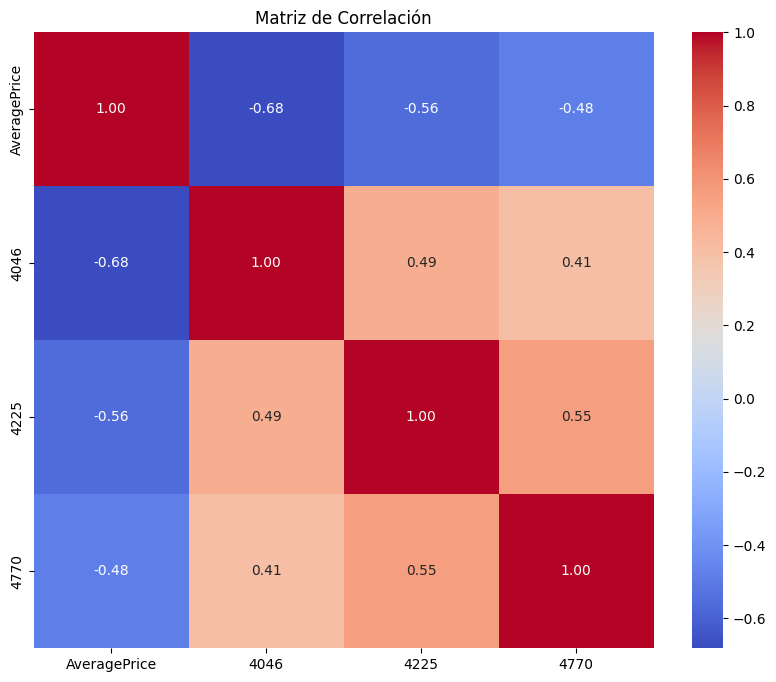

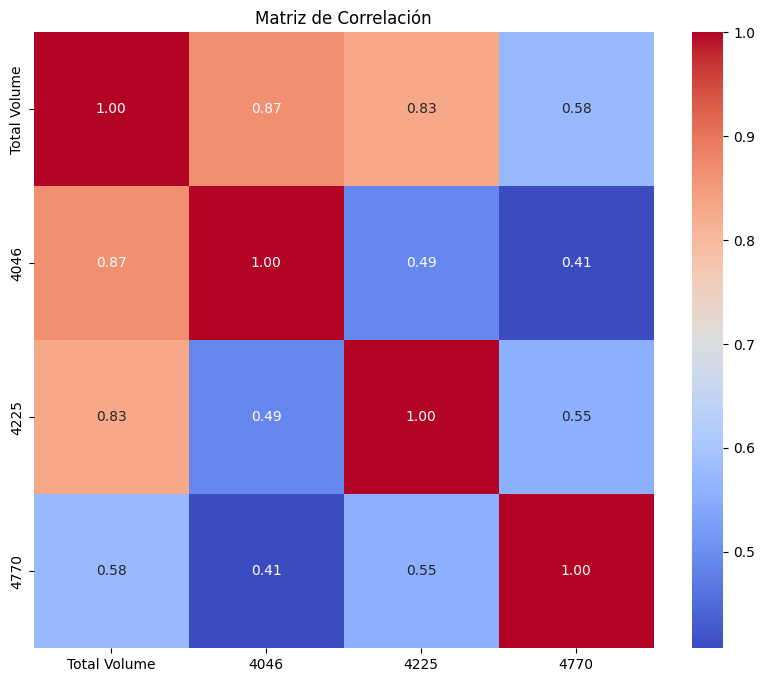

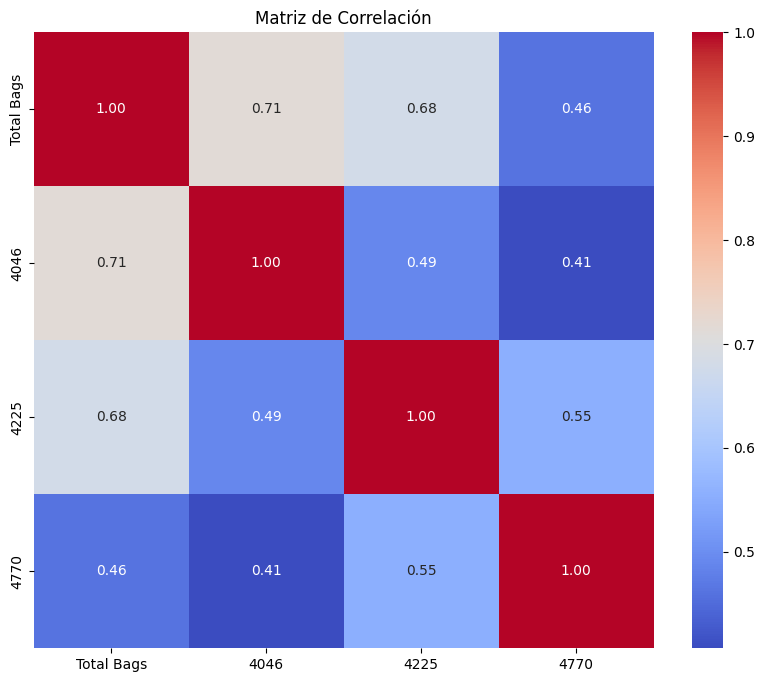

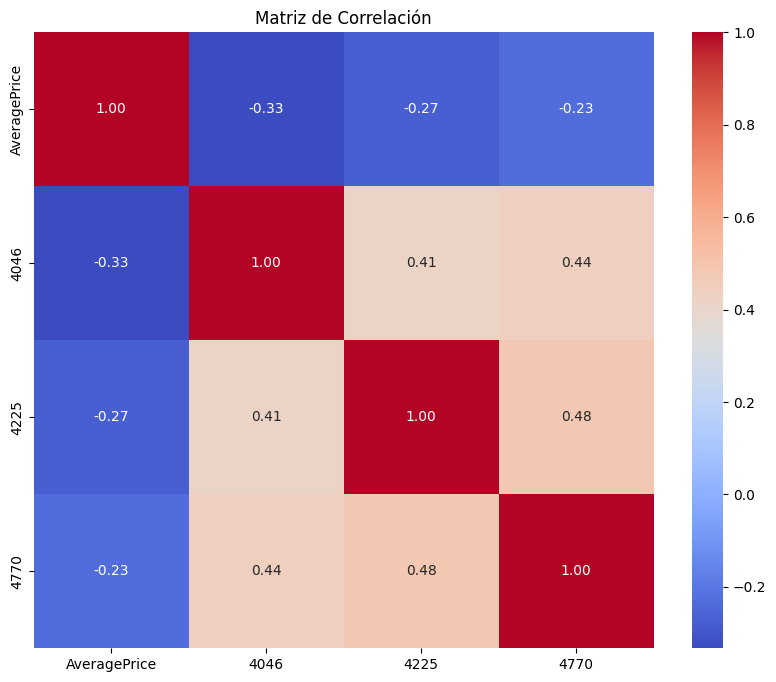

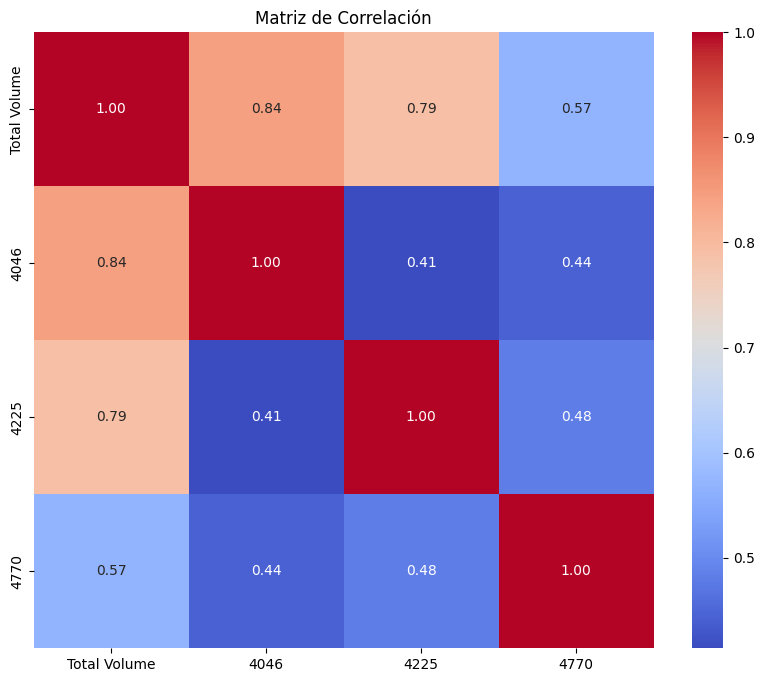

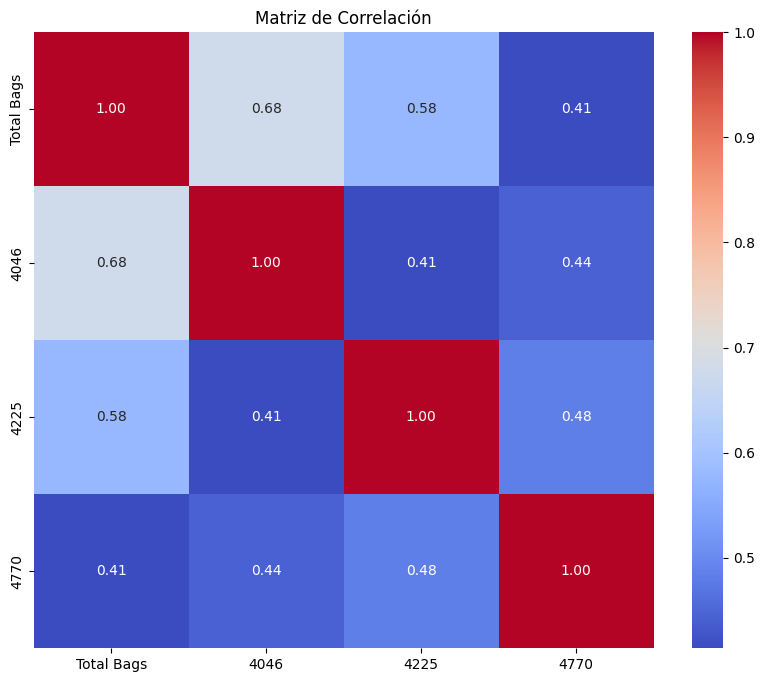

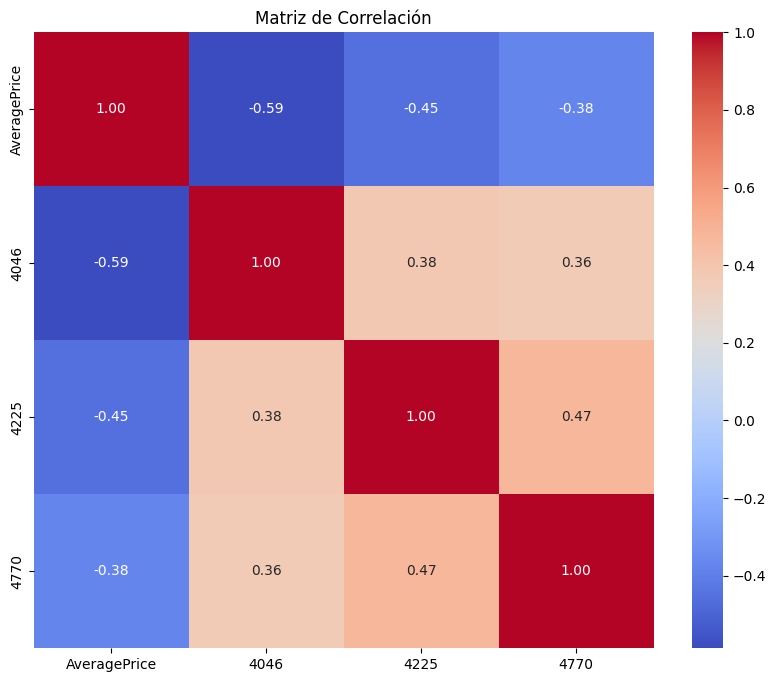

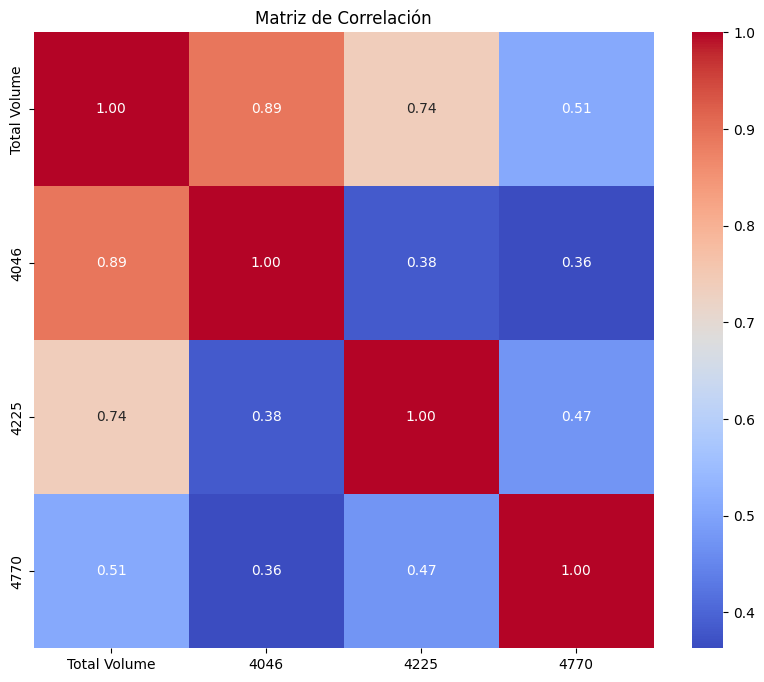

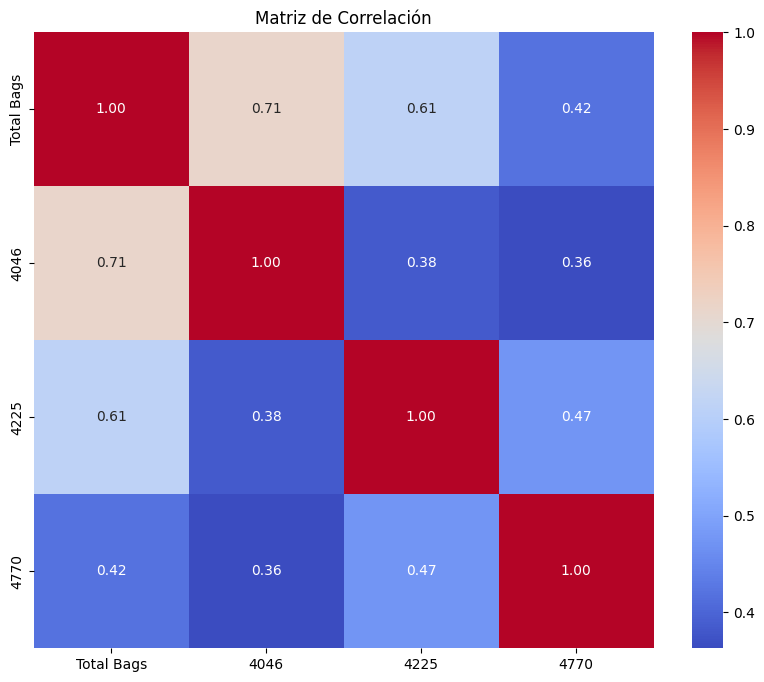

In [2]:
"""
5.1. Matriz de Correlación:

Uso de Datos: Utiliza las columnas numéricas del DataFrame (p. ej., AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags).
Esperado:
Importa las librerías necesarias: import seaborn as sns y import matplotlib.pyplot as plt.
Calcula la matriz de correlación usando el método .corr() del DataFrame.
Visualiza la matriz utilizando sns.heatmap().
Anota las correlaciones más significativas y discute su posible impacto en el análisis.
"""
# 5.1 Matriz de Correlación

# Select the numerical columns for correlation analysis
numerical_cols = ['AveragePrice', 'Total Volume', 'Total Bags']

for df2 in [ df_reduced, df_cities, df_regions ]:
    for cor in numerical_cols:
        # '4046', '4225', '4770',
        my_cols = [ cor, '4046', '4225', '4770']
        df_corr = df2[my_cols]

        # Calculate the correlation matrix
        correlation_matrix = df_corr.corr()

        # Visualize the correlation matrix using a heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Matriz de Correlación')
        plt.show()

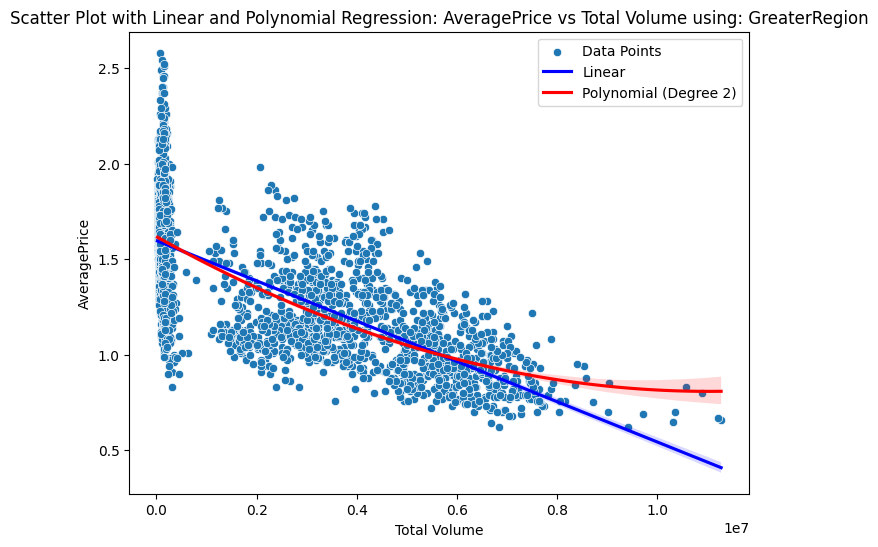

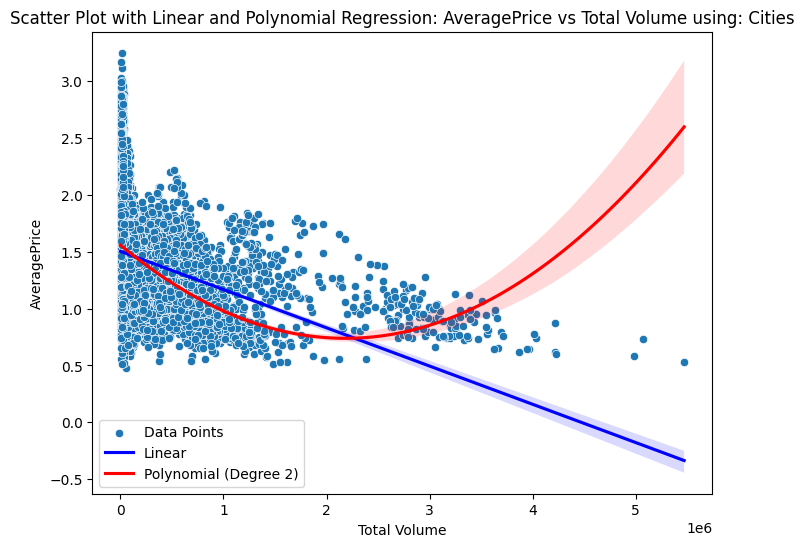

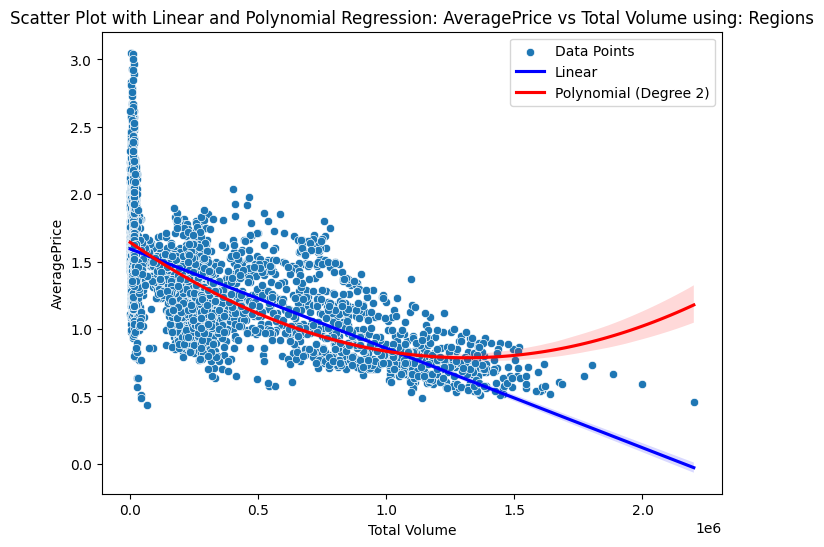

In [3]:
"""
5.2. Análisis de Dispersión entre Variables Clave:

Uso de Datos: Selecciona variables numéricas de interés como AveragePrice y Total Volume.
Esperado:
Importa las librerías necesarias: import seaborn as sns y import matplotlib.pyplot as plt.
Crea un gráfico de dispersión con sns.scatterplot() para visualizar la relación entre AveragePrice y Total Volume.
Añade una línea de regresión utilizando sns.regplot() para ilustrar las tendencias.
Compara el ajuste de una regresión lineal frente a una polinómica.
"""
# 5.2 Análisis de Dispersión entre Variables Clave

# Create a scatter plot
i = 0;
title = [ "GreaterRegion", "Cities", "Regions" ]
for df2 in [ df_reduced, df_cities, df_regions ]:
    """    
    sns.scatterplot(x='Total Volume', y='AveragePrice', data=df2)
    plt.title(f'Scatter Plot: AveragePrice vs Total Volume using: {title[i]}')
    i += 1
    plt.show()

    # Add a linear regression line
    sns.regplot(x='Total Volume', y='AveragePrice', data=df, scatter=False, label='Linear')

    # Add a polynomial regression line (degree=2 for example)
    sns.regplot(x='Total Volume', y='AveragePrice', data=df, scatter=False, order=2, label='Polynomial (Degree 2)')

    plt.legend()
    plt.show()
    """
    # Initialize the plot
    plt.figure(figsize=(8, 6))

    # Scatter plot with title
    sns.scatterplot(x='Total Volume', y='AveragePrice', data=df2, label='Data Points')

    # Add a linear regression line
    sns.regplot(x='Total Volume', y='AveragePrice', data=df2, scatter=False, label='Linear', color='blue')

    # Add a polynomial regression line (degree=2)
    sns.regplot(x='Total Volume', y='AveragePrice', data=df2, scatter=False, order=2, label='Polynomial (Degree 2)', color='red')

    # Customize the plot
    plt.title(f'Scatter Plot with Linear and Polynomial Regression: AveragePrice vs Total Volume using: {title[i]}')
    plt.xlabel('Total Volume')
    plt.ylabel('AveragePrice')
    plt.legend()
    plt.show()
    i += 1


Dataset: Reduced Data
R²: -0.2379419380147043
RMSE: 0.36369505918677414




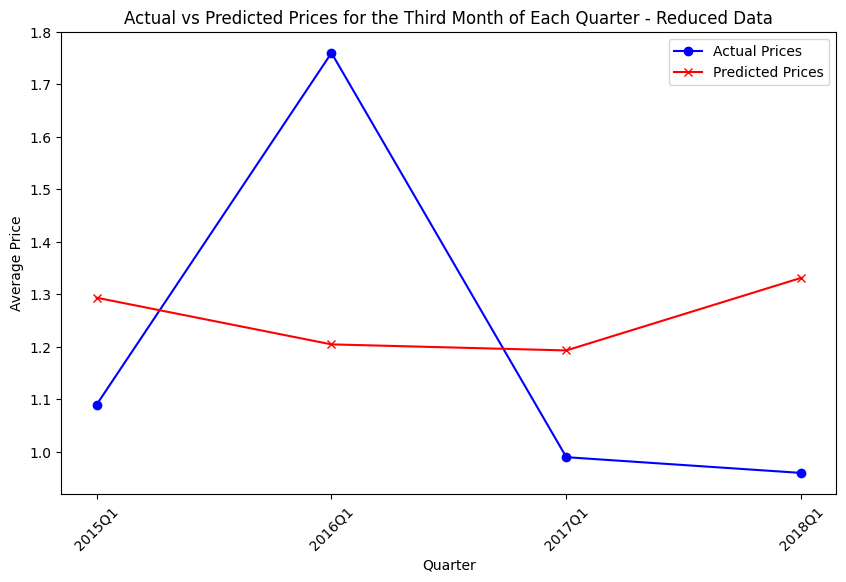

Dataset: Cities Data
R²: -1.098756856703539
RMSE: 0.34242506061612354




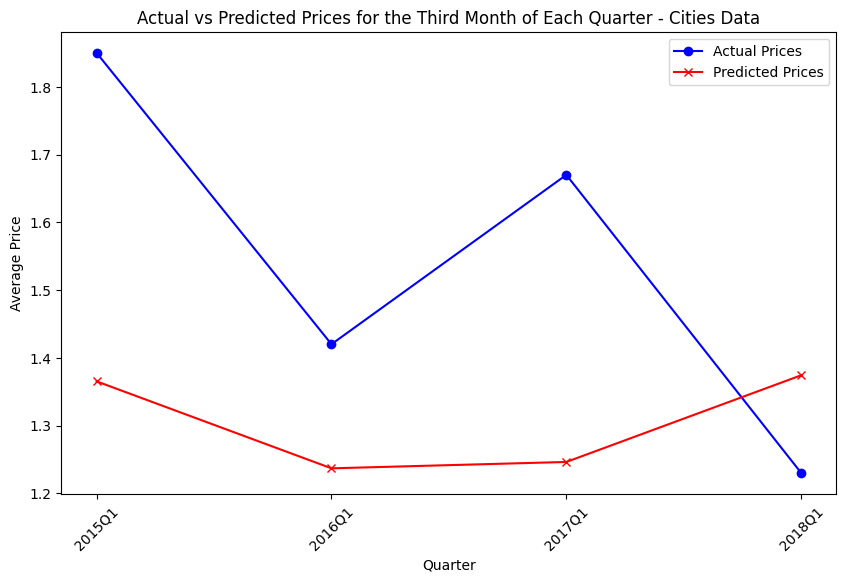

Dataset: Regions Data
R²: -0.4021433111630155
RMSE: 0.21122132345496794




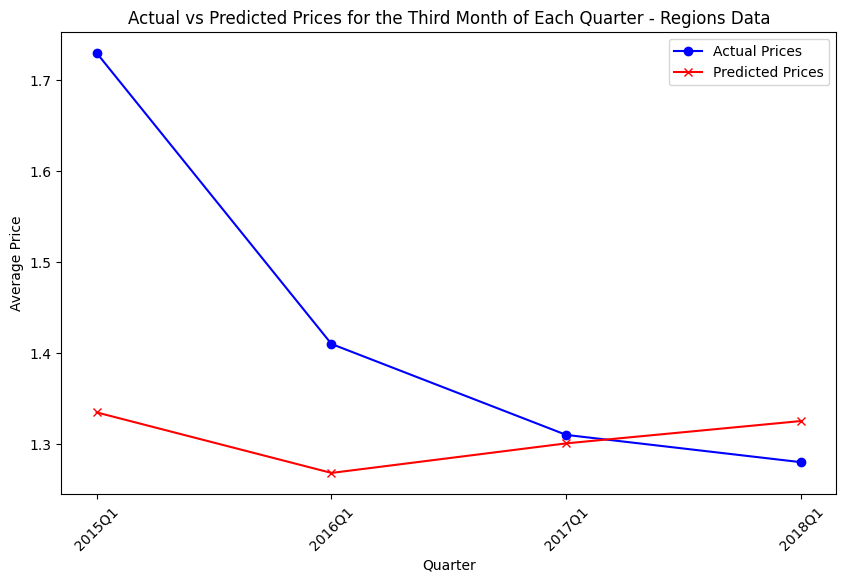

In [4]:
"""
5.3. Predicciones Mensuales Usando Datos Trimestrales:

Uso de Datos: Agrupa datos por trimestres y segmenta en meses utilizando Date, AveragePrice, y Total Volume.
Esperado:
Convierte la columna Date a tipo datetime si es necesario.
Agrupa los datos por trimestre y calcula el promedio de AveragePrice y Total Volume.
Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
Compara los resultados de las predicciones con los precios reales.
Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.
"""
# 5.3 Predicciones Mensuales Usando Datos Trimestrales
from sklearn.metrics import r2_score, mean_squared_error

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Loop over each dataset
for idx, data in enumerate(dataframes):
    
    # Create a column for the quarter and month
    data['Quarter'] = data['Date'].dt.to_period('Q')
    data['Month'] = data['Date'].dt.month
    
    # Group data by quarter and calculate the average of 'AveragePrice' and 'Total Volume'
    quarterly_data = data.groupby('Quarter').agg({
        'AveragePrice': 'mean',
        'Total Volume': 'mean'
    }).reset_index()
    
    # Initialize lists to store predictions and actual values
    predicted_prices = []
    actual_prices = []
    quarters = []

    # Loop through each quarter to make predictions
    for quarter in data['Quarter'].unique():
        # Filter data for the current quarter
        quarter_data = data[data['Quarter'] == quarter]
        
        # Separate the first two months and third month of the quarter
        first_two_months = quarter_data[quarter_data['Month'] <= 2]
        third_month = quarter_data[quarter_data['Month'] == 3]
        
        # Check if we have enough data for the prediction
        if len(first_two_months) >= 2 and not third_month.empty:
            # Calculate the average price for the first two months
            avg_price_first_two = first_two_months['AveragePrice'].mean()
            
            # Use this as the predicted price for the third month
            predicted_price = avg_price_first_two
            predicted_prices.append(predicted_price)
            
            # Store the actual price for the third month
            actual_price = third_month['AveragePrice'].values[0]
            actual_prices.append(actual_price)
            
            # Store the quarter for labeling
            quarters.append(str(quarter))
    
    # Convert to numpy arrays for evaluation
    predicted_prices = np.array(predicted_prices)
    actual_prices = np.array(actual_prices)
    
    # Evaluate prediction accuracy using R² and RMSE
    r2 = r2_score(actual_prices, predicted_prices)
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
    
    print(f"Dataset: {titles[idx]}")
    print(f"R²: {r2}")
    print(f"RMSE: {rmse}")
    print("\n")

    # Plot the actual vs predicted prices
    plt.figure(figsize=(10, 6))
    plt.plot(quarters, actual_prices, label='Actual Prices', marker='o', color='b')
    plt.plot(quarters, predicted_prices, label='Predicted Prices', marker='x', color='r')

    # Add titles and labels
    plt.title(f"Actual vs Predicted Prices for the Third Month of Each Quarter - {titles[idx]}")
    plt.xlabel('Quarter')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.legend()

    # Display the plot
    plt.show()


Dataset: Reduced Data
R²: 0.0048026288130265105
RMSE: 0.32609329816990734



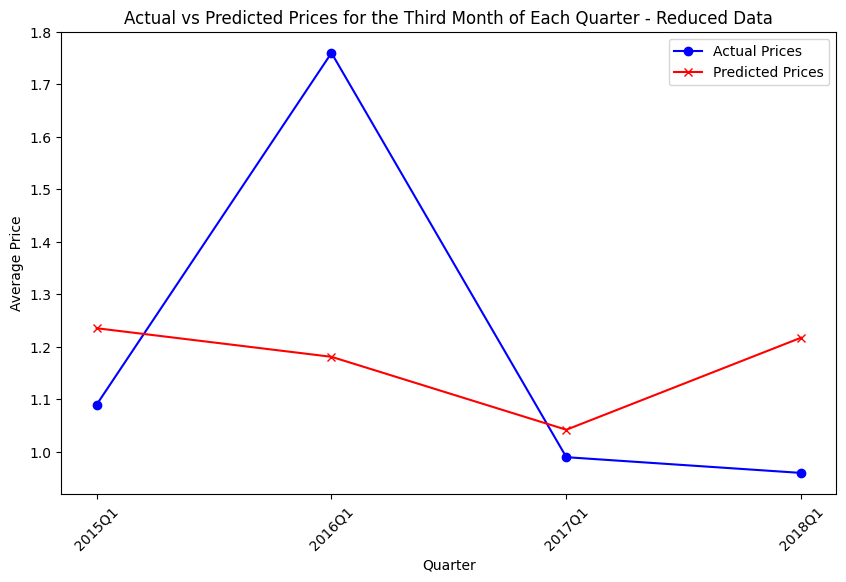

Dataset: Cities Data
R²: -1.597189449382849
RMSE: 0.3809222073471276



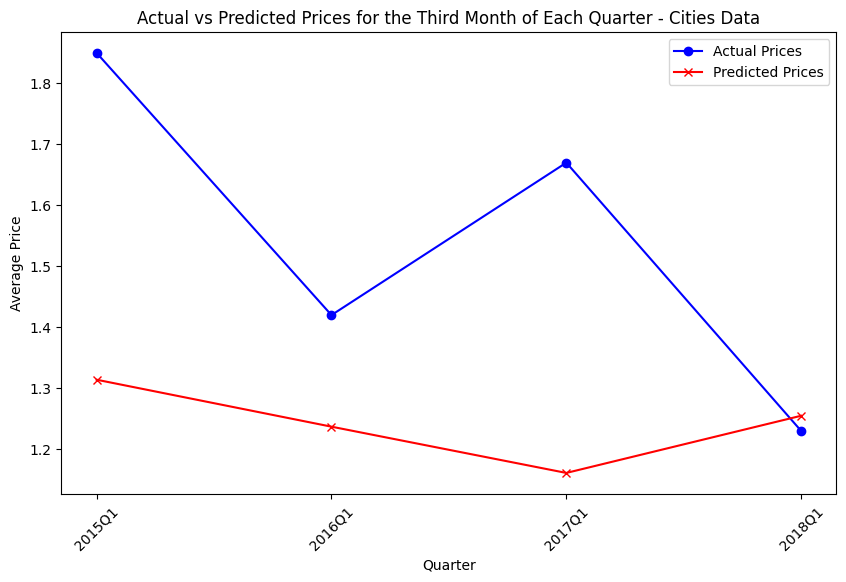

Dataset: Regions Data
R²: -0.8436515245025744
RMSE: 0.24220381282148776



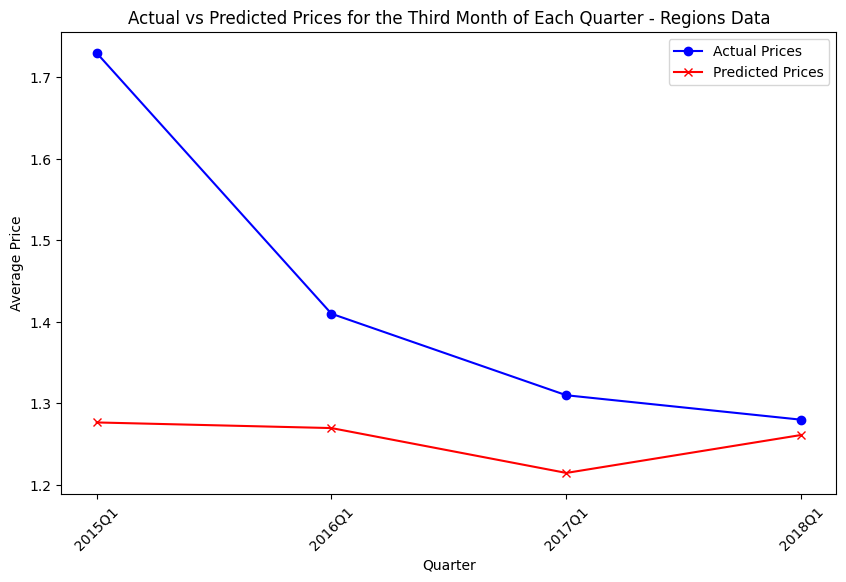

In [5]:
"""
5.3 Predicciones Mensuales Usando Datos Trimestrales:

Uso de Datos: Agrupa datos por trimestres y segmenta en meses utilizando Date, AveragePrice, y Total Volume.
Esperado:
Convierte la columna Date a tipo datetime si es necesario.
Agrupa los datos por trimestre y calcula el promedio de AveragePrice y Total Volume.
Utiliza los datos de los primeros 2 meses de un trimestre para predecir el precio del tercer mes.
Compara los resultados de las predicciones con los precios reales.
Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.

Suggestion from chatGPT to encrease R2 (squared)
Smooth Out Noise with Moving Averages
A moving average can help smooth out noise and emphasize underlying trends. 
You could try using a rolling average of AveragePrice over the previous months to predict the current month’s price.

Example: Using Linear Regression to Predict the Third Month
Here's how you could adapt your code to use a simple linear regression model. 
This model will use data from both the first and second months to predict the third month in each quarter.
"""
# 5.3 Predicciones Mensuales Usando Datos Trimestrales
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]
# Loop over each dataset
for idx, data in enumerate(dataframes):
    data['Quarter'] = data['Date'].dt.to_period('Q')
    data['Month'] = data['Date'].dt.month

    # Initialize lists for storing predictions and actual values
    predicted_prices = []
    actual_prices = []
    quarters = []

    for quarter in data['Quarter'].unique():
        # Filter data for the current quarter
        quarter_data = data[data['Quarter'] == quarter]

        # Separate the first two months and third month of the quarter
        first_two_months = quarter_data[quarter_data['Month'] <= 2]
        third_month = quarter_data[quarter_data['Month'] == 3]

        # Ensure we have enough data
        if len(first_two_months) >= 2 and not third_month.empty:
            # Prepare training data (first two months)
            X_train = np.array(first_two_months['Month']).reshape(-1, 1)
            y_train = first_two_months['AveragePrice'].values

            # Train a linear regression model
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Predict the third month using the trained model
            predicted_price = model.predict([[3]])[0]
            predicted_prices.append(predicted_price)

            # Store the actual price for the third month
            actual_price = third_month['AveragePrice'].values[0]
            actual_prices.append(actual_price)
            quarters.append(str(quarter))

    # Convert to numpy arrays for evaluation
    predicted_prices = np.array(predicted_prices)
    actual_prices = np.array(actual_prices)

    # Calculate evaluation metrics
    r2 = r2_score(actual_prices, predicted_prices)
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

    print(f"Dataset: {titles[idx]}")
    print(f"R²: {r2}")
    print(f"RMSE: {rmse}\n")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(quarters, actual_prices, label='Actual Prices', marker='o', color='b')
    plt.plot(quarters, predicted_prices, label='Predicted Prices', marker='x', color='r')
    plt.title(f"Actual vs Predicted Prices for the Third Month of Each Quarter - {titles[idx]}")
    plt.xlabel('Quarter')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

Dataset: Reduced Data
R²: -0.2642162841820004
RMSE: 0.14863278067088018



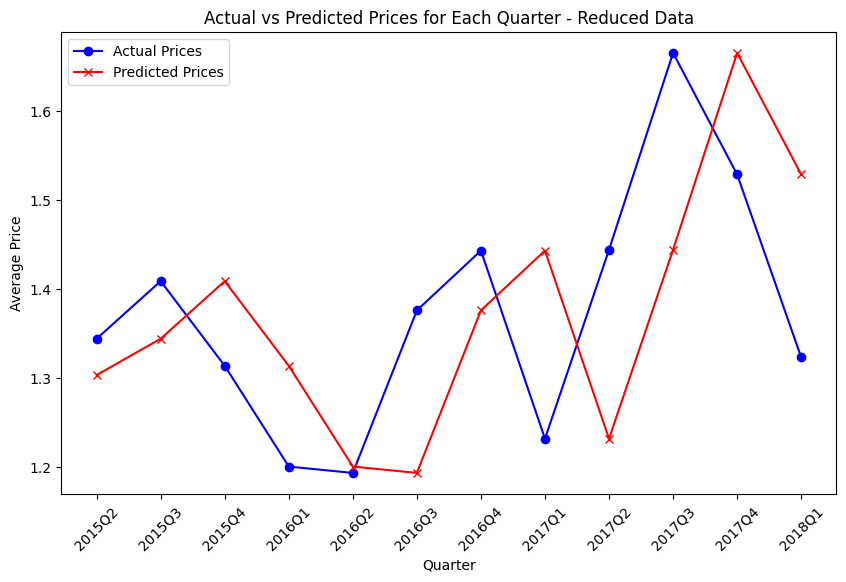

Dataset: Cities Data
R²: -0.17252598461364577
RMSE: 0.1523441903889465



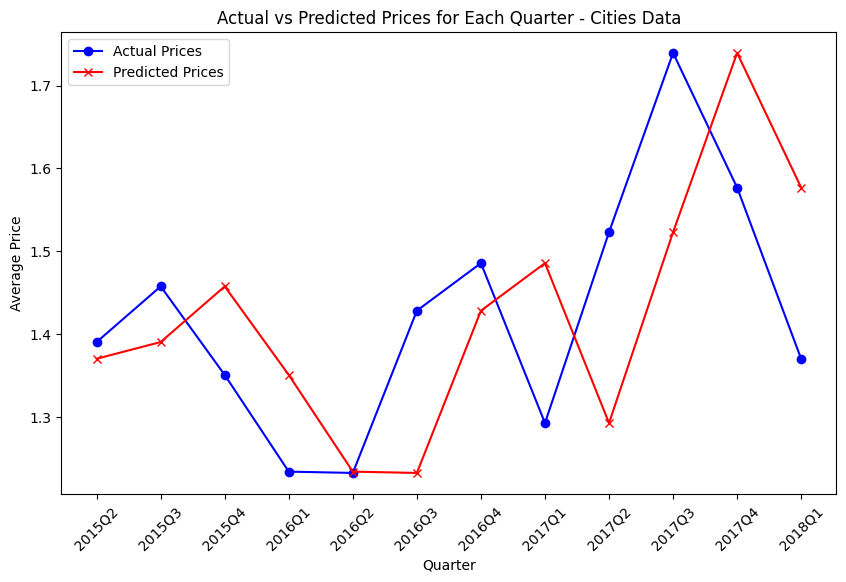

Dataset: Regions Data
R²: -0.11426711661846678
RMSE: 0.11891345514693094



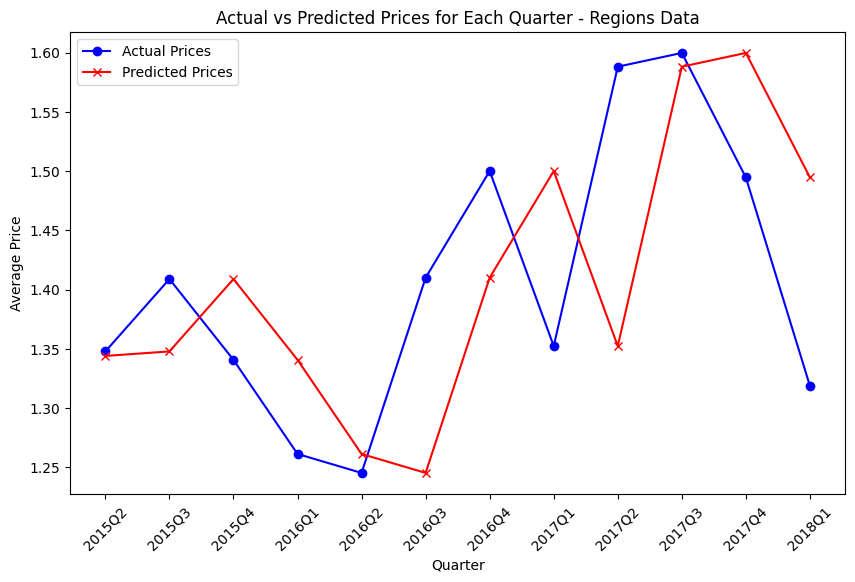

In [6]:
"""
5.4. Uso de Datos: Agrupa los datos en trimestres usando solo variables numéricas.
Esperado:
Agrupa los datos por trimestres usando pd.Grouper() con freq='Q' para obtener promedios.
Usa los datos de 1 o 2 trimestres anteriores para predecir el siguiente trimestre ajustando modelos de regresión lineal y polinómica.
Compara los resultados de las predicciones con los precios reales.
Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.
Predicciones Anuales:
"""
# 5.4 Predicciones  Trimestrales

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Loop over each dataset
for idx, data in enumerate(dataframes):
    # Convert Date to datetime and create a column for Quarter
    data['Quarter'] = data['Date'].dt.to_period('Q')

    # Group data by quarter and calculate the average for 'AveragePrice' and 'Total Volume'
    quarterly_data = data.groupby('Quarter').agg({
        'AveragePrice': 'mean',
        'Total Volume': 'mean'
    }).reset_index()

    # Initialize lists for storing predictions and actual values
    predicted_prices = []
    actual_prices = []
    quarters = []

    # Loop through each quarter, using previous quarters to predict the next quarter
    for i in range(len(quarterly_data) - 1):
        # Define the current quarter as the target to predict
        current_quarter = quarterly_data.iloc[i]
        next_quarter = quarterly_data.iloc[i + 1]

        # Prepare training data (average price of current quarter to predict next)
        X_train = np.array([[i]])
        y_train = current_quarter['AveragePrice']

        # Predict the next quarter's price
        model = LinearRegression()
        model.fit(X_train, [y_train])
        predicted_price = model.predict([[i + 1]])[0]
        predicted_prices.append(predicted_price)

        # Store the actual price for the next quarter
        actual_price = next_quarter['AveragePrice']
        actual_prices.append(actual_price)

        # Save the quarter label for plotting
        quarters.append(str(next_quarter['Quarter']))

    # Convert to numpy arrays for evaluation
    predicted_prices = np.array(predicted_prices)
    actual_prices = np.array(actual_prices)

    # Calculate evaluation metrics
    r2 = r2_score(actual_prices, predicted_prices)
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

    print(f"Dataset: {titles[idx]}")
    print(f"R²: {r2}")
    print(f"RMSE: {rmse}\n")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(quarters, actual_prices, label='Actual Prices', marker='o', color='b')
    plt.plot(quarters, predicted_prices, label='Predicted Prices', marker='x', color='r')
    plt.title(f"Actual vs Predicted Prices for Each Quarter - {titles[idx]}")
    plt.xlabel('Quarter')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


Dataset: Reduced Data
R²: -2.06982131101471
RMSE: 0.12909294762093804



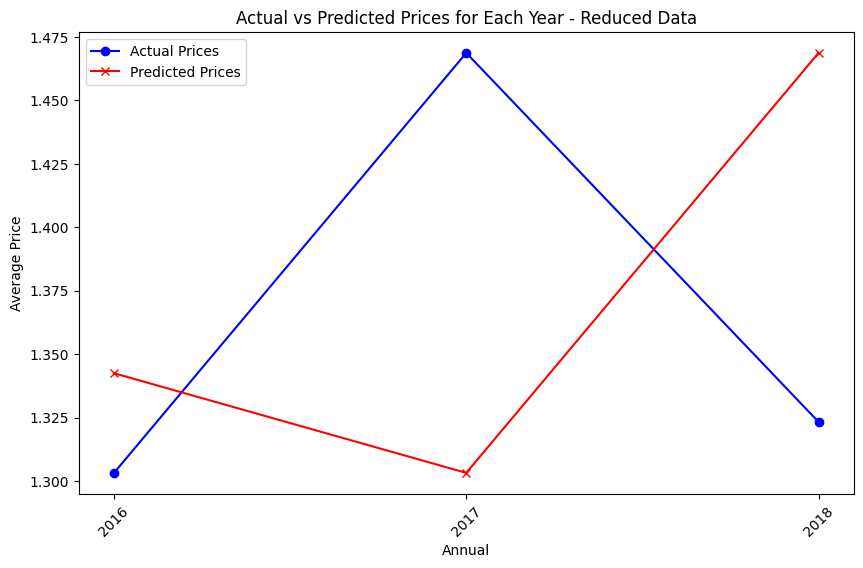

Dataset: Cities Data
R²: -2.076158538629749
RMSE: 0.1469564146371366



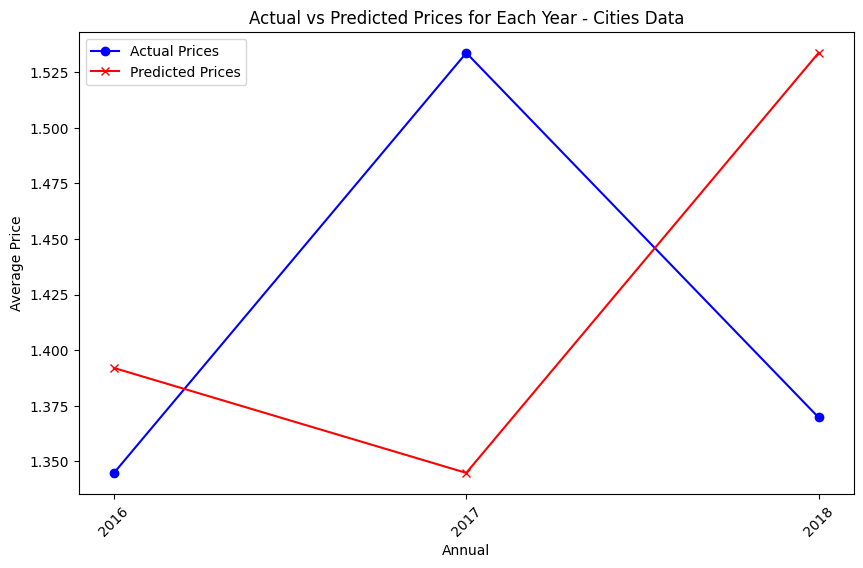

Dataset: Regions Data
R²: -1.9400391054982191
RMSE: 0.14109941411236337



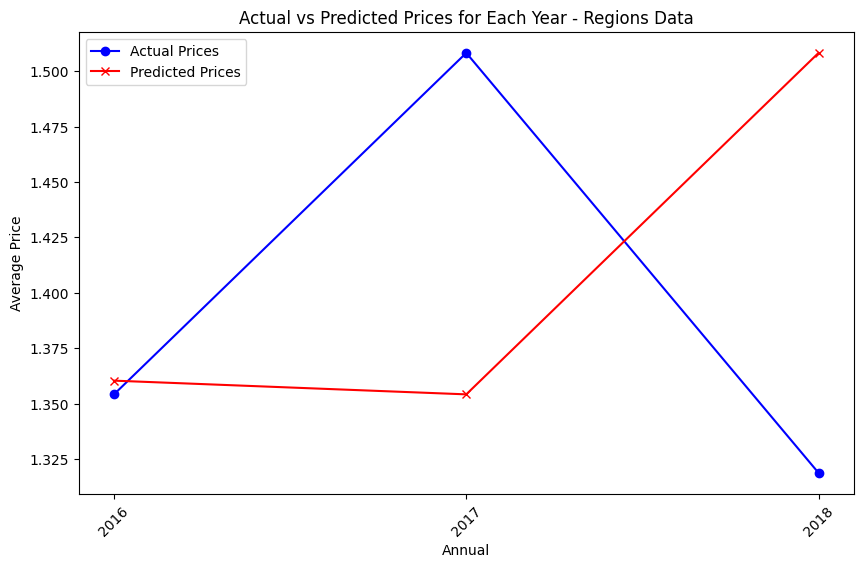

In [7]:
"""
5.5. Uso de Datos: Agrupa los datos en años, utilizando únicamente columnas numéricas.
Esperado:
Agrupa los datos por año utilizando pd.Grouper() con freq='Y'.
Usa los datos de 1 o 2 años anteriores para predecir el siguiente año ajustando modelos de regresión lineal y polinómica.
Evalúa la precisión de tus predicciones utilizando métricas como R² y RMSE.
"""
# 5.5 Uso de Datos: Agrupa los datos en años, utilizando únicamente columnas numéricas
#

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Loop over each dataset
for idx, data in enumerate(dataframes):
    # Convert Date to datetime and create a column for Quarter
    data['Annual'] = data['Date'].dt.to_period('Y')

    # Group data by quarter and calculate the average for 'AveragePrice' and 'Total Volume'
    quarterly_data = data.groupby('Annual').agg({
        'AveragePrice': 'mean',
        'Total Volume': 'mean'
    }).reset_index()

    # Initialize lists for storing predictions and actual values
    predicted_prices = []
    actual_prices = []
    quarters = []

    # Loop through each quarter, using previous quarters to predict the next quarter
    for i in range(len(quarterly_data) - 1):
        # Define the current quarter as the target to predict
        current_quarter = quarterly_data.iloc[i]
        next_quarter = quarterly_data.iloc[i + 1]

        # Prepare training data (average price of current quarter to predict next)
        X_train = np.array([[i]])
        y_train = current_quarter['AveragePrice']

        # Predict the next quarter's price
        model = LinearRegression()
        model.fit(X_train, [y_train])
        predicted_price = model.predict([[i + 1]])[0]
        predicted_prices.append(predicted_price)

        # Store the actual price for the next quarter
        actual_price = next_quarter['AveragePrice']
        actual_prices.append(actual_price)

        # Save the quarter label for plotting
        quarters.append(str(next_quarter['Annual']))

    # Convert to numpy arrays for evaluation
    predicted_prices = np.array(predicted_prices)
    actual_prices = np.array(actual_prices)

    # Calculate evaluation metrics
    r2 = r2_score(actual_prices, predicted_prices)
    rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

    print(f"Dataset: {titles[idx]}")
    print(f"R²: {r2}")
    print(f"RMSE: {rmse}\n")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(quarters, actual_prices, label='Actual Prices', marker='o', color='b')
    plt.plot(quarters, predicted_prices, label='Predicted Prices', marker='x', color='r')
    plt.title(f"Actual vs Predicted Prices for Each Year - {titles[idx]}")
    plt.xlabel('Annual')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()



Dataset: Reduced Data
R²: 0.5225084774169476
RMSE: 0.24418588797679577


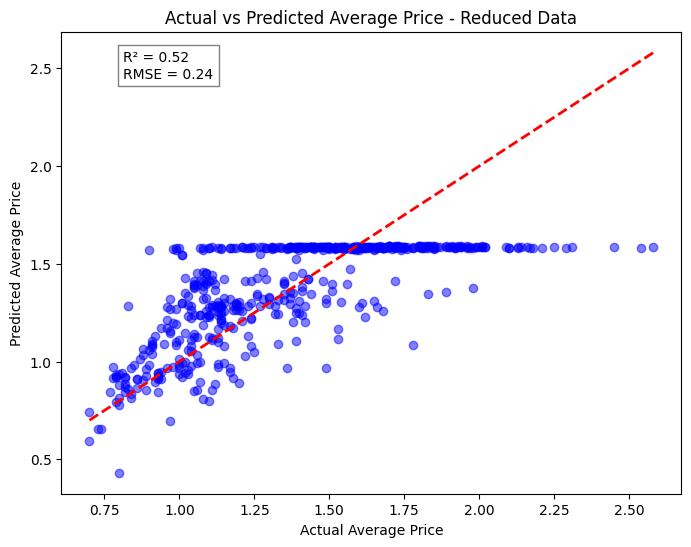


Dataset: Cities Data
R²: 0.15251289072216312
RMSE: 0.3720291608165298


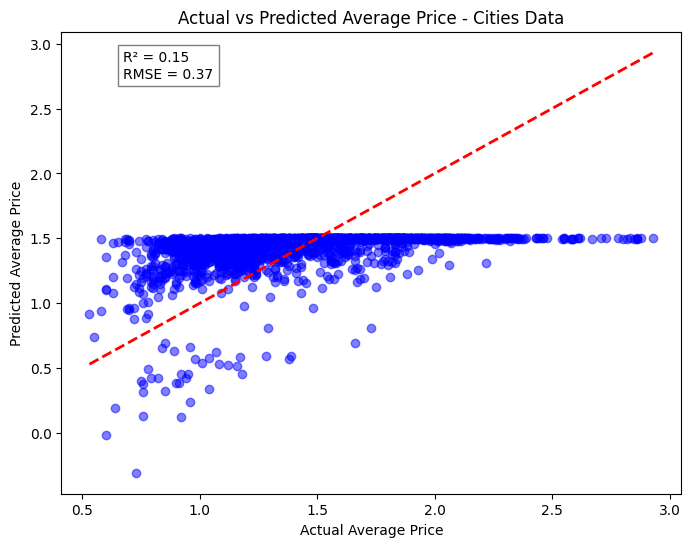


Dataset: Regions Data
R²: 0.44554352735672287
RMSE: 0.30440213367334357


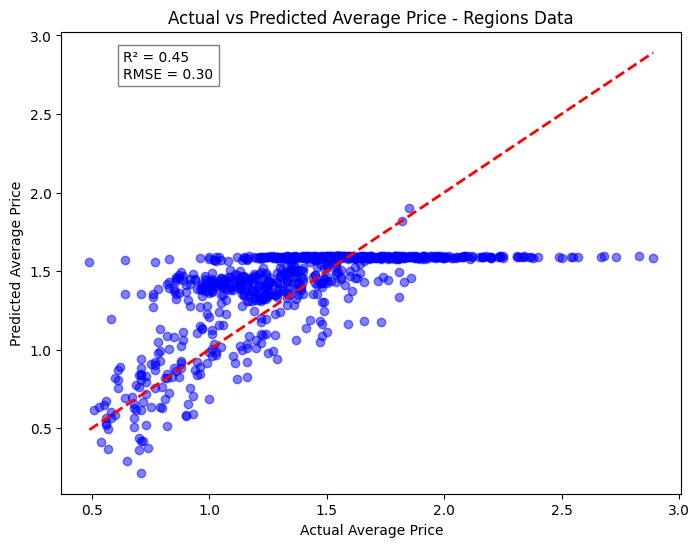

In [8]:
#5.6 Desarrollo de Modelos de Regresión Múltiple
"""
Desarrollo de Modelos de Regresión Múltiple:

Uso de Datos: Selecciona varias variables numéricas como Total Volume, 4046, 4225, 4770, y Total Bags para predecir AveragePrice.
Esperado:
Define las variables independientes (X) y dependientes (y).
Ajusta modelos de regresión múltiple.
Compara su rendimiento utilizando métricas como R² y RMSE y discute las implicaciones de los resultados.
"""
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Loop over each dataset
for idx, data in enumerate(dataframes):
    # Define independent (X) and dependent (y) variables
    X = data[['Total Volume', '4046', '4225', '4770', 'Total Bags']]
    y = data['AveragePrice']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and fit the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Print results
    print(f"\nDataset: {titles[idx]}")
    print(f"R²: {r2}")
    print(f"RMSE: {rmse}")

    # Plot Actual vs. Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='b')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line y=x
    plt.title(f'Actual vs Predicted Average Price - {titles[idx]}')
    plt.xlabel('Actual Average Price')
    plt.ylabel('Predicted Average Price')
    plt.text(0.1, 0.9, f'R² = {r2:.2f}\nRMSE = {rmse:.2f}', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.5))
    plt.show()


In [9]:
# 5.7 Análisis de Coeficientes de Regresión Múltiple
"""
Análisis de Coeficientes de Regresión Múltiple:

Uso de Datos: Examina los coeficientes de los modelos de regresión múltiple ajustados.
Esperado:
Extrae los coeficientes del modelo ajustado.
Interpreta los coeficientes para entender el impacto de cada variable numérica en AveragePrice.
Comenta sobre las variables más significativas y su relevancia.
"""
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Loop over each dataset
for idx, data in enumerate(dataframes):
    # Define independent (X) and dependent (y) variables
    X = data[['Total Volume', '4046', '4225', '4770', 'Total Bags']]
    y = data['AveragePrice']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and fit the regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Extract coefficients
    coefficients = model.coef_
    feature_names = X.columns
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    
    # Print results
    print(f"\nDataset: {titles[idx]}")
    print("Regression Coefficients:")
    print(coef_df)
    print(f"Intercept: {model.intercept_:.4f}")


Dataset: Reduced Data
Regression Coefficients:
        Feature  Coefficient
0  Total Volume    -0.000001
1          4046     0.000001
2          4225     0.000001
3          4770     0.000001
4    Total Bags     0.000001
Intercept: 1.5915

Dataset: Cities Data
Regression Coefficients:
        Feature  Coefficient
0  Total Volume     0.000029
1          4046    -0.000029
2          4225    -0.000029
3          4770    -0.000030
4    Total Bags    -0.000029
Intercept: 1.5016

Dataset: Regions Data
Regression Coefficients:
        Feature  Coefficient
0  Total Volume     0.002280
1          4046    -0.002281
2          4225    -0.002281
3          4770    -0.002284
4    Total Bags    -0.002281
Intercept: 1.5965



Dataset: Reduced Data
Linear Regression - R²: 0.5225, RMSE: 0.2442
Polynomial Regression (Degree 2) - R²: 0.5536, RMSE: 0.2361


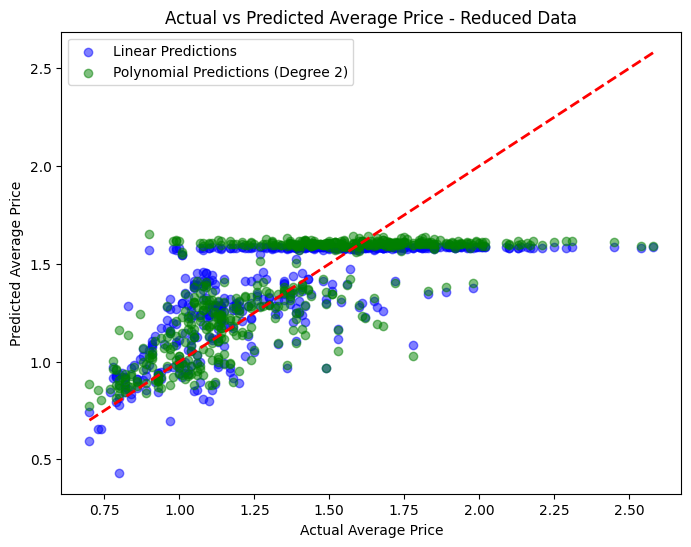


Dataset: Cities Data
Linear Regression - R²: 0.1525, RMSE: 0.3720
Polynomial Regression (Degree 2) - R²: 0.2505, RMSE: 0.3499


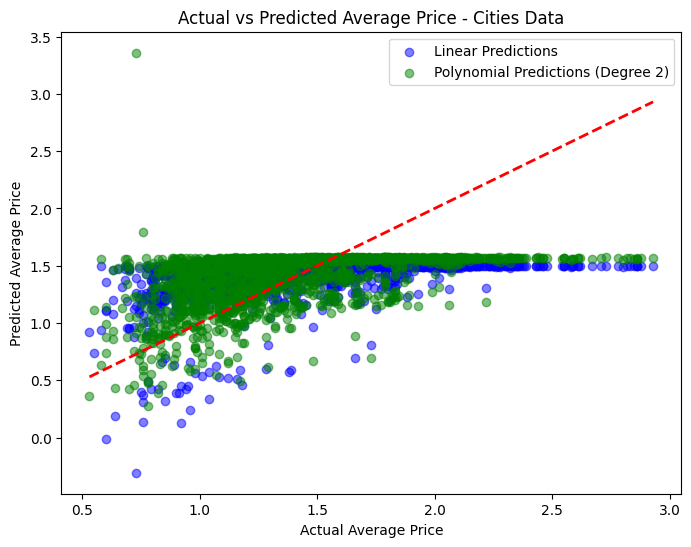


Dataset: Regions Data
Linear Regression - R²: 0.4446, RMSE: 0.3047
Polynomial Regression (Degree 2) - R²: 0.5369, RMSE: 0.2782


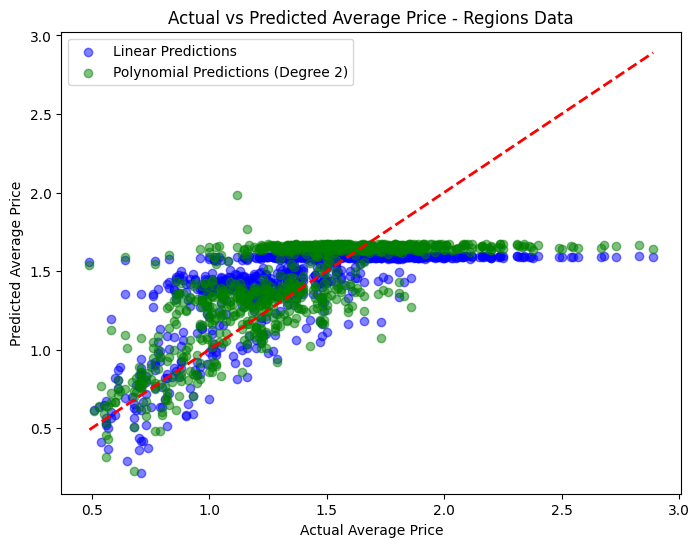

In [13]:
# 5.8 Modelos de Regresión para Diferenciar Volúmenes de Ventas
"""
Modelos de Regresión para Diferenciar Volúmenes de Ventas:

Uso de Datos: Usa AveragePrice, Total Volume, 4046, 4225, y 4770.
Esperado:
Ajusta modelos de regresión para analizar cómo los diferentes volúmenes de ventas afectan AveragePrice.
Compara los resultados de regresión lineal y polinómica.
Presenta las conclusiones de tus análisis.
"""
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Define the features and target
features = ['Total Volume', '4046', '4225', '4770']
target = 'AveragePrice'

# Degree of polynomial for polynomial regression
poly_degree = 2

# Loop over each dataset
for idx, data in enumerate(dataframes):
    print(f"\nDataset: {titles[idx]}")
    
    # Define independent (X) and dependent (y) variables
    X = data[features]
    y = data[target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    r2_linear = r2_score(y_test, y_pred_linear)
    rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
    print(f"Linear Regression - R²: {r2_linear:.4f}, RMSE: {rmse_linear:.4f}")
    
    # Polynomial Regression
    poly = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
    print(f"Polynomial Regression (Degree {poly_degree}) - R²: {r2_poly:.4f}, RMSE: {rmse_poly:.4f}")
    
    # Comparison Plot: Linear vs Polynomial Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_linear, label="Linear Predictions", alpha=0.5, color="blue")
    plt.scatter(y_test, y_pred_poly, label=f"Polynomial Predictions (Degree {poly_degree})", alpha=0.5, color="green")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
    plt.title(f"Actual vs Predicted Average Price - {titles[idx]}")
    plt.xlabel("Actual Average Price")
    plt.ylabel("Predicted Average Price")
    plt.legend()
    plt.show()


Dataset: Reduced Data
Linear Regression Coefficients:
Total Volume: -0.0000
Total Bags: 0.0000
Intercept: 1.5963
Linear Regression - R²: 0.5061, RMSE: 0.2484
Polynomial Regression (Degree 2) - R²: 0.5332, RMSE: 0.2414


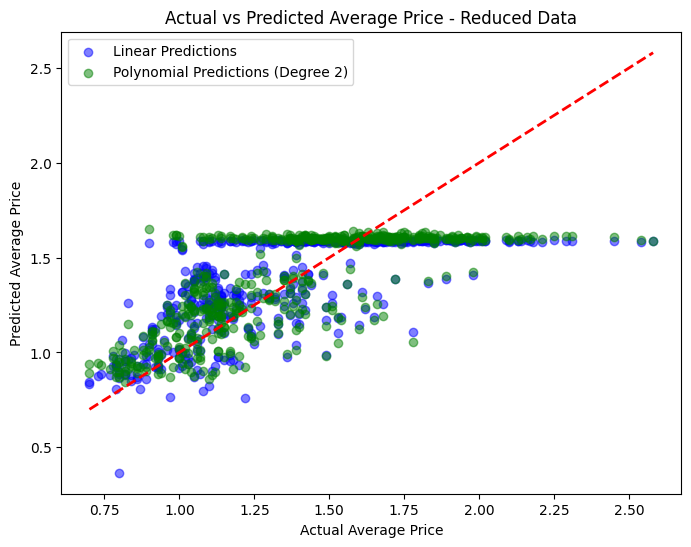


Dataset: Cities Data
Linear Regression Coefficients:
Total Volume: -0.0000
Total Bags: -0.0000
Intercept: 1.5036
Linear Regression - R²: 0.1546, RMSE: 0.3716
Polynomial Regression (Degree 2) - R²: 0.2213, RMSE: 0.3566


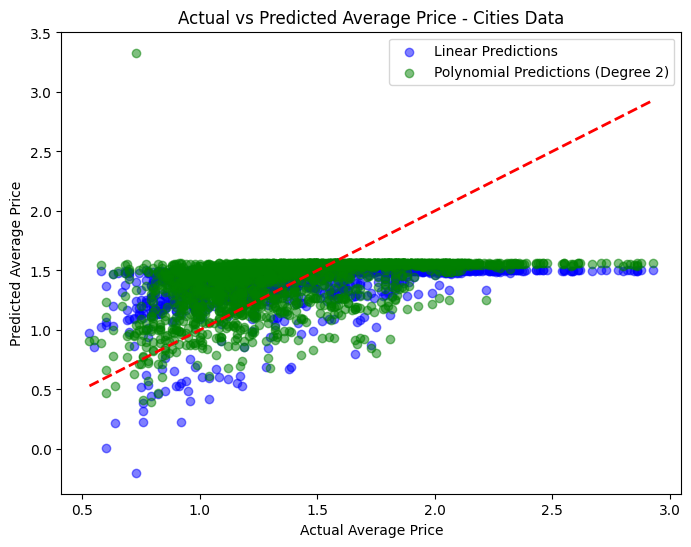


Dataset: Regions Data
Linear Regression Coefficients:
Total Volume: -0.0000
Total Bags: -0.0000
Intercept: 1.6013
Linear Regression - R²: 0.4424, RMSE: 0.3053
Polynomial Regression (Degree 2) - R²: 0.5031, RMSE: 0.2882


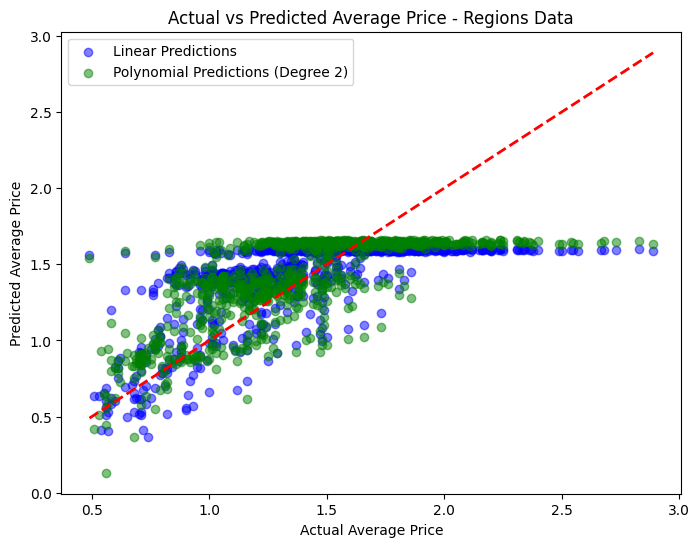

In [14]:
# 5.9.Análisis de la Influencia de las Ventas Totales en el Precio Promedio
"""
Análisis de la Influencia de las Ventas Totales en el Precio Promedio:

Uso de Datos: Usa Total Volume, AveragePrice, y Total Bags.
Esperado:
Ajusta un modelo de regresión lineal y polinómica para ver cómo varía AveragePrice en función del volumen total de ventas.
Evalúa la significancia de los coeficientes y discute su relevancia.
"""
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Define the features and target
features = ['Total Volume', 'Total Bags']
target = 'AveragePrice'

# Degree of polynomial for polynomial regression
poly_degree = 2

# Loop over each dataset
for idx, data in enumerate(dataframes):
    print(f"\nDataset: {titles[idx]}")
    
    # Define independent (X) and dependent (y) variables
    X = data[features]
    y = data[target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    r2_linear = r2_score(y_test, y_pred_linear)
    rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
    
    # Print Linear Model Coefficients
    print("Linear Regression Coefficients:")
    for feature, coef in zip(features, linear_model.coef_):
        print(f"{feature}: {coef:.4f}")
    print(f"Intercept: {linear_model.intercept_:.4f}")
    print(f"Linear Regression - R²: {r2_linear:.4f}, RMSE: {rmse_linear:.4f}")
    
    # Polynomial Regression
    poly = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
    
    print(f"Polynomial Regression (Degree {poly_degree}) - R²: {r2_poly:.4f}, RMSE: {rmse_poly:.4f}")
    
    # Comparison Plot: Linear vs Polynomial Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_linear, label="Linear Predictions", alpha=0.5, color="blue")
    plt.scatter(y_test, y_pred_poly, label=f"Polynomial Predictions (Degree {poly_degree})", alpha=0.5, color="green")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
    plt.title(f"Actual vs Predicted Average Price - {titles[idx]}")
    plt.xlabel("Actual Average Price")
    plt.ylabel("Predicted Average Price")
    plt.legend()
    plt.show()



Dataset: Reduced Data
Linear Regression - R²: 0.5225, RMSE: 0.2442
Polynomial Regression (Degree 2) - R²: 0.5536, RMSE: 0.2361


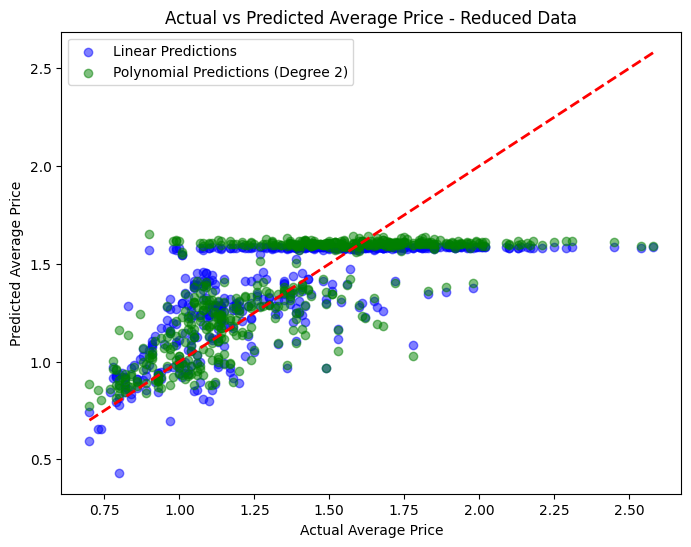


Dataset: Cities Data
Linear Regression - R²: 0.1525, RMSE: 0.3720
Polynomial Regression (Degree 2) - R²: 0.2505, RMSE: 0.3499


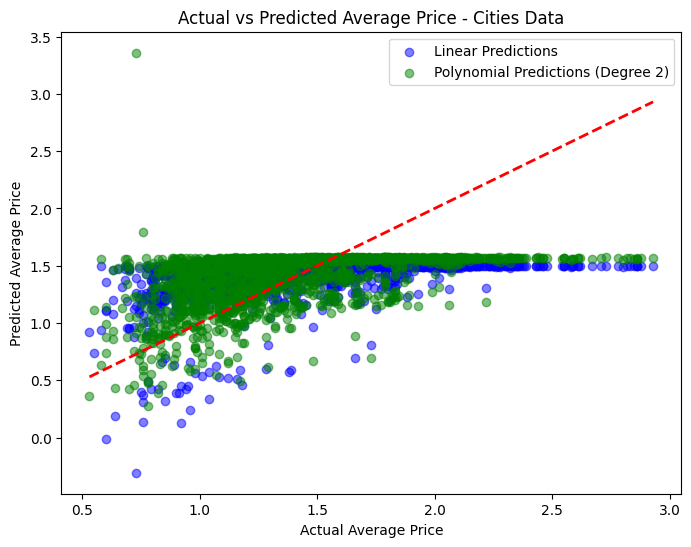


Dataset: Regions Data
Linear Regression - R²: 0.4446, RMSE: 0.3047
Polynomial Regression (Degree 2) - R²: 0.5369, RMSE: 0.2782


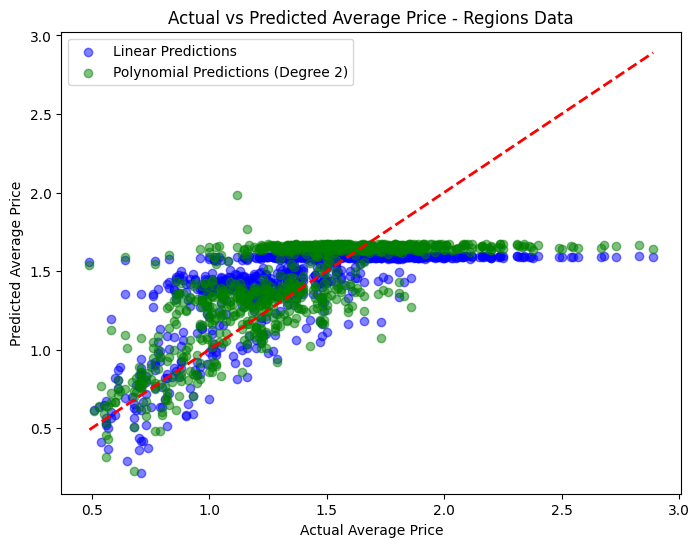

In [15]:
# 5.10. Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo
"""
Regresión para Predecir el Precio Promedio Según el Volumen de Aguacates por Tipo:

Uso de Datos: Usa AveragePrice, 4046, 4225, 4770, y Total Volume.
Esperado:
Ajusta modelos de regresión lineal y polinómica.
Evalúa la efectividad de ambos modelos utilizando métricas como R² y RMSE.
Discute cuál modelo ofrece mejores predicciones y por qué, basándote en los resultados obtenidos.
"""
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List of dataframes to loop through
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Define the features and target
features = ['4046', '4225', '4770', 'Total Volume']
target = 'AveragePrice'

# Degree of polynomial for polynomial regression
poly_degree = 2

# Loop over each dataset
for idx, data in enumerate(dataframes):
    print(f"\nDataset: {titles[idx]}")
    
    # Define independent (X) and dependent (y) variables
    X = data[features]
    y = data[target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    r2_linear = r2_score(y_test, y_pred_linear)
    rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
    print(f"Linear Regression - R²: {r2_linear:.4f}, RMSE: {rmse_linear:.4f}")
    
    # Polynomial Regression
    poly = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
    print(f"Polynomial Regression (Degree {poly_degree}) - R²: {r2_poly:.4f}, RMSE: {rmse_poly:.4f}")
    
    # Comparison Plot: Linear vs Polynomial Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_linear, label="Linear Predictions", alpha=0.5, color="blue")
    plt.scatter(y_test, y_pred_poly, label=f"Polynomial Predictions (Degree {poly_degree})", alpha=0.5, color="green")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
    plt.title(f"Actual vs Predicted Average Price - {titles[idx]}")
    plt.xlabel("Actual Average Price")
    plt.ylabel("Predicted Average Price")
    plt.legend()
    plt.show()


In [16]:
# 5.10bis - usando comparativa r2 test y r2 train
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Polynomial degree (can adjust based on performance)
poly_degree = 2

# Initialize models
linear_model = LinearRegression()
poly = PolynomialFeatures(degree=poly_degree)
poly_model = LinearRegression()

# Datasets to evaluate
dataframes = [df_reduced, df_cities, df_regions]
titles = ["Reduced Data", "Cities Data", "Regions Data"]

# Features and target
features = ['4046', '4225', '4770', 'Total Volume']
target = 'AveragePrice'

# Initialize list to store results
results = []

# Loop over each dataset
for idx, data in enumerate(dataframes):
    print(f"\nDataset: {titles[idx]}")
    
    # Define X and y
    X = data[features]
    y = data[target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression
    linear_model.fit(X_train, y_train)
    y_train_pred_linear = linear_model.predict(X_train)
    y_test_pred_linear = linear_model.predict(X_test)
    
    # Calculate metrics for Linear Regression
    r2_train_linear = r2_score(y_train, y_train_pred_linear)
    r2_test_linear = r2_score(y_test, y_test_pred_linear)
    mse_train_linear = mean_squared_error(y_train, y_train_pred_linear)
    mse_test_linear = mean_squared_error(y_test, y_test_pred_linear)
    rmse_train_linear = np.sqrt(mse_train_linear)
    rmse_test_linear = np.sqrt(mse_test_linear)
    
    # Store results for linear model
    results.append({
        "Dataset": titles[idx],
        "Model": "Linear",
        "R² Train": r2_train_linear,
        "R² Test": r2_test_linear,
        "R² Gap": abs(r2_train_linear - r2_test_linear),
        "RMSE Train": rmse_train_linear,
        "RMSE Test": rmse_test_linear,
        "RMSE Gap": abs(rmse_train_linear - rmse_test_linear)
    })
    
    # Polynomial Regression
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_model.fit(X_train_poly, y_train)
    y_train_pred_poly = poly_model.predict(X_train_poly)
    y_test_pred_poly = poly_model.predict(X_test_poly)
    
    # Calculate metrics for Polynomial Regression
    r2_train_poly = r2_score(y_train, y_train_pred_poly)
    r2_test_poly = r2_score(y_test, y_test_pred_poly)
    mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
    mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
    rmse_train_poly = np.sqrt(mse_train_poly)
    rmse_test_poly = np.sqrt(mse_test_poly)
    
    # Store results for polynomial model
    results.append({
        "Dataset": titles[idx],
        "Model": f"Polynomial (Degree {poly_degree})",
        "R² Train": r2_train_poly,
        "R² Test": r2_test_poly,
        "R² Gap": abs(r2_train_poly - r2_test_poly),
        "RMSE Train": rmse_train_poly,
        "RMSE Test": rmse_test_poly,
        "RMSE Gap": abs(rmse_train_poly - rmse_test_poly)
    })
    
# Display results in a table for easy comparison
results_df = pd.DataFrame(results)
print("\nModel Comparison Table:")
print(results_df)




Dataset: Reduced Data

Dataset: Cities Data

Dataset: Regions Data

Model Comparison Table:
        Dataset                  Model  R² Train   R² Test    R² Gap  \
0  Reduced Data                 Linear  0.553606  0.522500  0.031106   
1  Reduced Data  Polynomial (Degree 2)  0.577339  0.553555  0.023783   
2   Cities Data                 Linear  0.143915  0.152512  0.008597   
3   Cities Data  Polynomial (Degree 2)  0.254614  0.250484  0.004130   
4  Regions Data                 Linear  0.420415  0.444622  0.024207   
5  Regions Data  Polynomial (Degree 2)  0.505950  0.536914  0.030964   

   RMSE Train  RMSE Test  RMSE Gap  
0    0.232916   0.244188  0.011272  
1    0.226640   0.236114  0.009474  
2    0.385687   0.372029  0.013658  
3    0.359888   0.349865  0.010022  
4    0.316722   0.304655  0.012067  
5    0.292419   0.278192  0.014227  
